0.7412615922882885
0.7472239067749573
0.7789462068375205
(251, 10)
(250, 10)


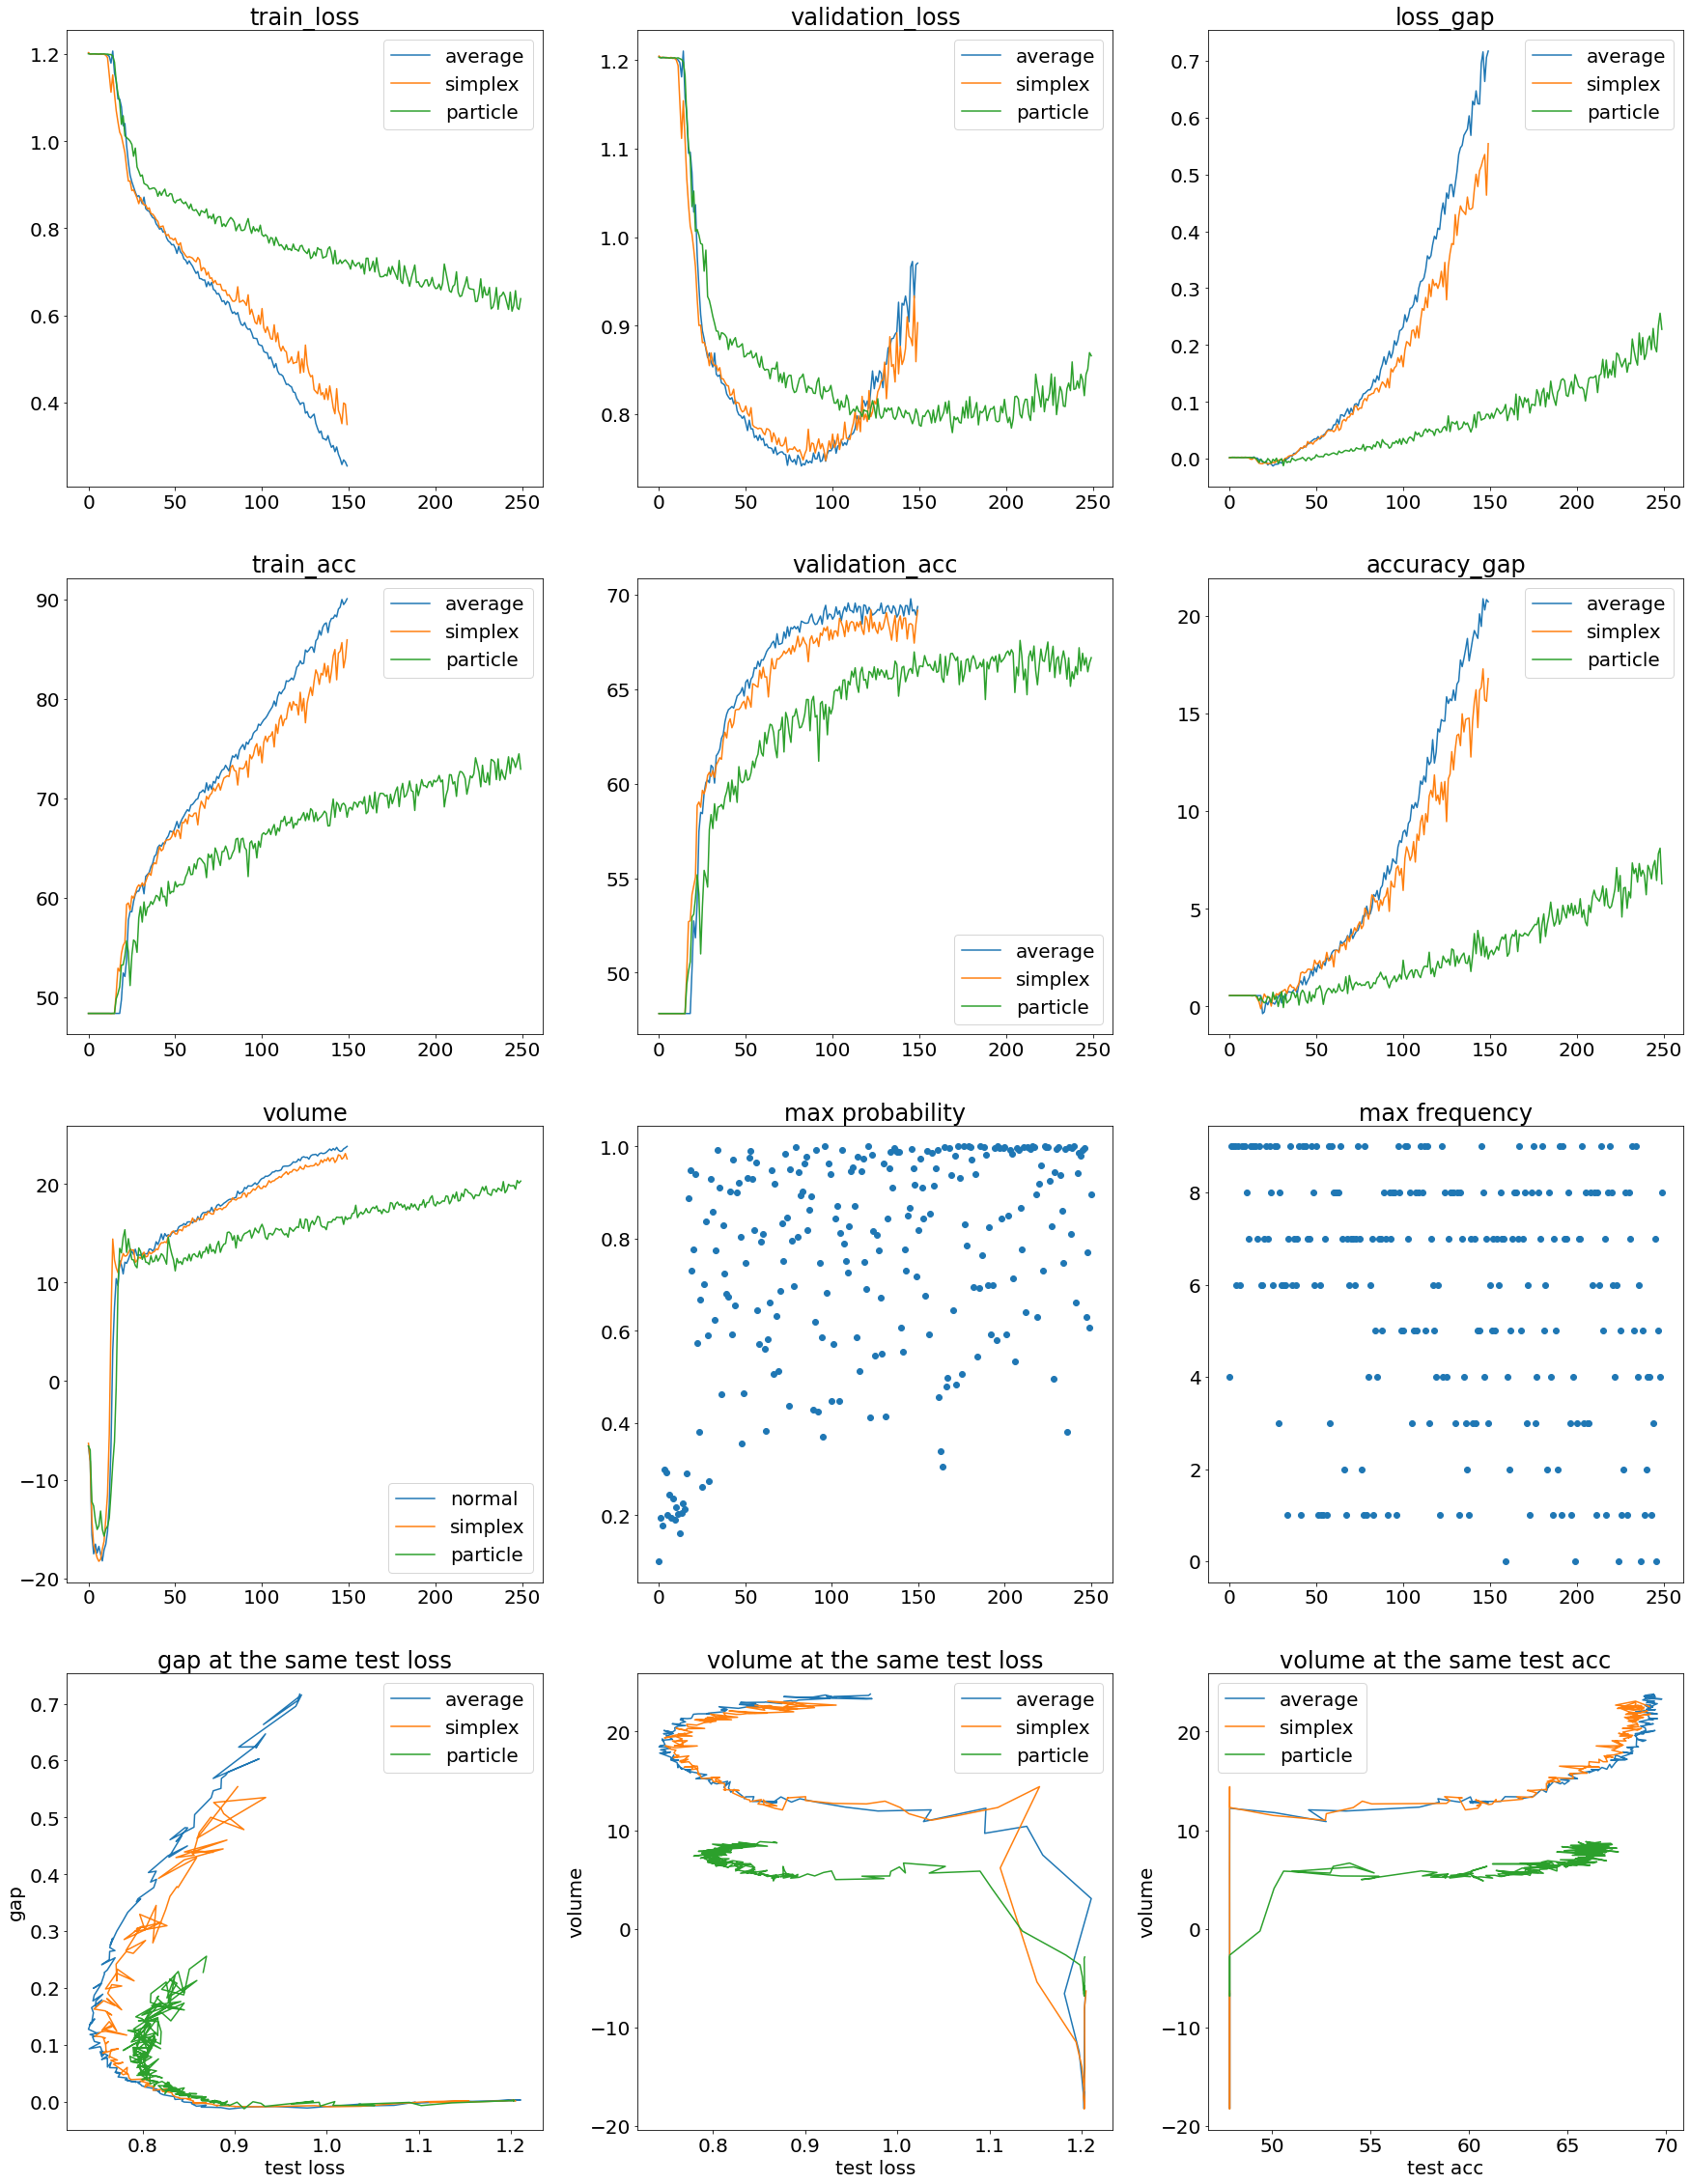

In [56]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({'font.size': 20})
file_prefix = '/Users/jclialex/PycharmProjects/whiteboxmi_expdata/expdata/simplex/'

epochs = np.arange(149)+1
num_user = 10
dataset = 'fashion_product_season'
eval_data_size = 100
model = 'fashion_product'
total_data_num = 2000
#num_step_list = [1,5,10,20]
num_step_list = [20]
batch_size = 100
total_step = int(total_data_num / batch_size)
#comm_round_list = [[19],[3],[1],[0]]
comm_round_list = [[0]]
particle_total_epoch = 250

particle_chosen_index = []


for this_step in num_step_list:
    fig = plt.figure(figsize=(30,40))
    
    plt.subplot(4,3,1)
    file_name = file_prefix+f'loss_{num_user}_'+str(this_step)+f'_{dataset}_2000_{model}.npy'
    this_loss = np.load(file_name)
    plt.plot(np.arange(len(this_loss)),this_loss[:,0])
    file_name = file_prefix+f'loss_{num_user}_'+str(this_step)+f'_simplex_sampling_{dataset}_2000_{model}.npy'
    this_loss = np.load(file_name)
    plt.plot(np.arange(len(this_loss)),this_loss[:,0])
    file_name = file_prefix+f'loss_{num_user}_{this_step}_{particle_total_epoch}_particle_{dataset}_2000_{model}.npy'
    this_loss = np.load(file_name)
    this_loss = np.reshape(this_loss,(-1,num_user,2))
    
    for i in range(len(this_loss)):
        this_epoch_test_loss = this_loss[i,:,1]
        particle_chosen_index.append(np.argmin(this_epoch_test_loss))
    chosen_loss = [this_loss[i,particle_chosen_index[i],0] for i in range(len(this_loss))]
    
    plt.plot(np.arange(len(this_loss)),chosen_loss)
    plt.title("train_loss")
    plt.legend(['average','simplex','particle'])

    plt.subplot(4,3,2)
    file_name = file_prefix+f'loss_{num_user}_'+str(this_step)+f'_{dataset}_2000_{model}.npy'
    this_loss = np.load(file_name)
    print (np.amin(this_loss[:,1]))
    plt.plot(np.arange(len(this_loss)),this_loss[:,1])
    file_name = file_prefix+f'loss_{num_user}_'+str(this_step)+f'_simplex_sampling_{dataset}_2000_{model}.npy'
    this_loss = np.load(file_name)
    print (np.amin(this_loss[:,1]))
    plt.plot(np.arange(len(this_loss)),this_loss[:,1])
    file_name = file_prefix+f'loss_{num_user}_{this_step}_{particle_total_epoch}_particle_{dataset}_2000_{model}.npy'
    this_loss = np.load(file_name)
    this_loss = np.reshape(this_loss,(-1,num_user,2))
    chosen_loss = [this_loss[i,particle_chosen_index[i],1] for i in range(len(this_loss))]
    print (np.amin(chosen_loss))
    plt.plot(np.arange(len(this_loss)),chosen_loss)
    plt.legend(['average','simplex','particle'])
    plt.title("validation_loss")
    
    plt.subplot(4,3,3)
    file_name = file_prefix+f'loss_{num_user}_'+str(this_step)+f'_{dataset}_2000_{model}.npy'
    this_loss = np.load(file_name)
    plt.plot(np.arange(len(this_loss)),this_loss[:,1]-this_loss[:,0])
    file_name = file_prefix+f'loss_{num_user}_'+str(this_step)+f'_simplex_sampling_{dataset}_2000_{model}.npy'
    this_loss = np.load(file_name)
    plt.plot(np.arange(len(this_loss)),this_loss[:,1]-this_loss[:,0])
    file_name = file_prefix+f'loss_{num_user}_{this_step}_{particle_total_epoch}_particle_{dataset}_2000_{model}.npy'
    this_loss = np.load(file_name)
    this_loss = np.reshape(this_loss,(-1,num_user,2))
    chosen_loss = [this_loss[i,particle_chosen_index[i],1]-this_loss[i,particle_chosen_index[i],0] for i in range(len(this_loss))]
    plt.plot(np.arange(len(this_loss)),chosen_loss)
    plt.legend(['average','simplex','particle'])
    plt.title("loss_gap")

    plt.subplot(4,3,4)
    file_name = file_prefix+f'acc_{num_user}_'+str(this_step)+f'_{dataset}_2000_{model}.npy'
    this_loss = np.load(file_name)
    plt.plot(np.arange(len(this_loss)),this_loss[:,0])
    file_name = file_prefix+f'acc_{num_user}_'+str(this_step)+f'_simplex_sampling_{dataset}_2000_{model}.npy'
    this_loss = np.load(file_name)
    plt.plot(np.arange(len(this_loss)),this_loss[:,0])
    file_name = file_prefix+f'acc_{num_user}_{this_step}_{particle_total_epoch}_particle_{dataset}_2000_{model}.npy'
    this_loss = np.load(file_name)
    this_loss = np.reshape(this_loss,(-1,num_user,2))
    chosen_loss = [this_loss[i,particle_chosen_index[i],0] for i in range(len(this_loss))]
    plt.plot(np.arange(len(this_loss)),chosen_loss)
    plt.title("train_acc")
    plt.legend(['average','simplex','particle'])
    
    plt.subplot(4,3,5)
    file_name = file_prefix+f'acc_{num_user}_'+str(this_step)+f'_{dataset}_2000_{model}.npy'
    this_loss = np.load(file_name)
    plt.plot(np.arange(len(this_loss)),this_loss[:,1])
    file_name = file_prefix+f'acc_{num_user}_'+str(this_step)+f'_simplex_sampling_{dataset}_2000_{model}.npy'
    this_loss = np.load(file_name)
    plt.plot(np.arange(len(this_loss)),this_loss[:,1])
    file_name = file_prefix+f'acc_{num_user}_{this_step}_{particle_total_epoch}_particle_{dataset}_2000_{model}.npy'
    this_loss = np.load(file_name)
    this_loss = np.reshape(this_loss,(-1,num_user,2))
    chosen_loss = [this_loss[i,particle_chosen_index[i],1] for i in range(len(this_loss))]
    plt.plot(np.arange(len(this_loss)),chosen_loss)
    plt.legend(['average','simplex','particle'])
    plt.title("validation_acc")
    
    plt.subplot(4,3,6)
    file_name = file_prefix+f'acc_{num_user}_'+str(this_step)+f'_{dataset}_2000_{model}.npy'
    this_loss = np.load(file_name)
    plt.plot(np.arange(len(this_loss)),this_loss[:,0] - this_loss[:,1])
    file_name = file_prefix+f'acc_{num_user}_'+str(this_step)+f'_simplex_sampling_{dataset}_2000_{model}.npy'
    this_loss = np.load(file_name)
    plt.plot(np.arange(len(this_loss)),this_loss[:,0] - this_loss[:,1])
    file_name = file_prefix+f'acc_{num_user}_{this_step}_{particle_total_epoch}_particle_{dataset}_2000_{model}.npy'
    this_loss = np.load(file_name)
    this_loss = np.reshape(this_loss,(-1,num_user,2))
    chosen_loss = [this_loss[i,particle_chosen_index[i],0]-this_loss[i,particle_chosen_index[i],1] for i in range(len(this_loss))]
    plt.plot(np.arange(len(this_loss)),chosen_loss)
    plt.legend(['average','simplex','particle'])
    plt.title("accuracy_gap")
    
    plt.subplot(4,3,7)
    file_name = file_prefix+f'volume_{num_user}_'+str(this_step)+f'_{dataset}_2000_{model}.npy'
    this_volume = np.load(file_name)
    plt.plot(np.arange(len(this_volume)),np.log(this_volume[:,1]))
    file_name = file_prefix+f'volume_{num_user}_'+str(this_step)+f'_simplex_sampling_{dataset}_2000_{model}.npy'
    this_volume = np.load(file_name)
    plt.plot(np.arange(len(this_volume)),np.log(this_volume[:,1]))
    file_name = file_prefix+f'volume_{num_user}_'+str(this_step)+f'_{particle_total_epoch}_particle_{dataset}_2000_{model}.npy'
    this_volume = np.load(file_name)
    plt.plot(np.arange(len(this_volume)),np.log(this_volume[:,1]))
    plt.legend(['normal','simplex','particle'])
    plt.title('volume')
    
    plt.subplot(4,3,8)
    file_name = file_prefix+f'likelihood_{num_user}_'+str(this_step)+f'_{particle_total_epoch}_particle_{dataset}_2000_{model}.npy'
    this_likelihood = np.load(file_name)
    print (this_likelihood.shape)
    plt.scatter(np.arange(len(this_likelihood)),np.amax(this_likelihood,axis=1))
    plt.title('max probability')
    
    plt.subplot(4,3,9)
    file_name = file_prefix+f'sampling_stat_{num_user}_'+str(this_step)+f'_{particle_total_epoch}_particle_{dataset}_2000_{model}.npy'
    this_likelihood = np.load(file_name)
    print (this_likelihood.shape)
    plt.scatter(np.arange(len(this_likelihood)),np.amax(this_likelihood,axis=1))
    plt.title('max frequency')
    
    plt.subplot(4,3,10)
    file_name = file_prefix+f'loss_{num_user}_'+str(this_step)+f'_{dataset}_2000_{model}.npy'
    this_loss = np.load(file_name)
    plt.plot(this_loss[:,1],this_loss[:,1] - this_loss[:,0])
    file_name = file_prefix+f'loss_{num_user}_'+str(this_step)+f'_simplex_sampling_{dataset}_2000_{model}.npy'
    this_loss = np.load(file_name)
    plt.plot(this_loss[:,1],this_loss[:,1] - this_loss[:,0])
    file_name = file_prefix+f'loss_{num_user}_{this_step}_{particle_total_epoch}_particle_{dataset}_2000_{model}.npy'
    this_loss = np.load(file_name)
    this_loss = np.reshape(this_loss,(-1,num_user,2))
    chosen_test_loss = np.array([this_loss[i,particle_chosen_index[i],1] for i in range(len(this_loss))])
    chosen_train_loss = np.array([this_loss[i,particle_chosen_index[i],0] for i in range(len(this_loss))])
    plt.plot(chosen_test_loss,chosen_test_loss-chosen_train_loss)
    plt.legend(['average','simplex','particle'])
    plt.title("gap at the same test loss")
    plt.xlabel('test loss')
    plt.ylabel('gap')
    
    plt.subplot(4,3,11)
    file_name = file_prefix+f'loss_{num_user}_'+str(this_step)+f'_{dataset}_2000_{model}.npy'
    this_loss = np.load(file_name)
    file_name = file_prefix+f'volume_{num_user}_'+str(this_step)+f'_{dataset}_2000_{model}.npy'
    this_volume = np.load(file_name)
    plt.plot(this_loss[:,1],np.log(this_volume[:,1]))
    file_name = file_prefix+f'loss_{num_user}_'+str(this_step)+f'_simplex_sampling_{dataset}_2000_{model}.npy'
    this_loss = np.load(file_name)
    file_name = file_prefix+f'volume_{num_user}_'+str(this_step)+f'_simplex_sampling_{dataset}_2000_{model}.npy'
    this_volume = np.load(file_name)
    plt.plot(this_loss[:,1],np.log(this_volume[:,1]))
    file_name = file_prefix+f'loss_{num_user}_{this_step}_{particle_total_epoch}_particle_{dataset}_2000_{model}.npy'
    this_loss = np.load(file_name)
    this_loss = np.reshape(this_loss,(-1,num_user,2))
    file_name = file_prefix+f'volume_{num_user}_'+str(this_step)+f'_{particle_total_epoch}_particle_{dataset}_2000_{model}.npy'
    this_volume = np.load(file_name)
    chosen_test_loss = np.array([this_loss[i,particle_chosen_index[i],1] for i in range(len(this_loss))])
    chosen_train_loss = np.array([this_loss[i,particle_chosen_index[i],0] for i in range(len(this_loss))])
    plt.plot(chosen_test_loss,np.log10(this_volume[:,1]))
    plt.legend(['average','simplex','particle'])
    plt.title("volume at the same test loss")
    plt.xlabel('test loss')
    plt.ylabel('volume')
    
    
    plt.subplot(4,3,12)
    file_name = file_prefix+f'acc_{num_user}_'+str(this_step)+f'_{dataset}_2000_{model}.npy'
    this_loss = np.load(file_name)
    file_name = file_prefix+f'volume_{num_user}_'+str(this_step)+f'_{dataset}_2000_{model}.npy'
    this_volume = np.load(file_name)
    plt.plot(this_loss[:,1],np.log(this_volume[:,1]))
    file_name = file_prefix+f'acc_{num_user}_'+str(this_step)+f'_simplex_sampling_{dataset}_2000_{model}.npy'
    this_loss = np.load(file_name)
    file_name = file_prefix+f'volume_{num_user}_'+str(this_step)+f'_simplex_sampling_{dataset}_2000_{model}.npy'
    this_volume = np.load(file_name)
    plt.plot(this_loss[:,1],np.log(this_volume[:,1]))
    file_name = file_prefix+f'acc_{num_user}_{this_step}_{particle_total_epoch}_particle_{dataset}_2000_{model}.npy'
    this_loss = np.load(file_name)
    this_loss = np.reshape(this_loss,(-1,num_user,2))
    file_name = file_prefix+f'volume_{num_user}_'+str(this_step)+f'_{particle_total_epoch}_particle_{dataset}_2000_{model}.npy'
    this_volume = np.load(file_name)
    chosen_test_loss = np.array([this_loss[i,particle_chosen_index[i],1] for i in range(len(this_loss))])
    chosen_train_loss = np.array([this_loss[i,particle_chosen_index[i],0] for i in range(len(this_loss))])
    plt.plot(chosen_test_loss,np.log10(this_volume[:,1]))
    plt.legend(['average','simplex','particle'])
    plt.title("volume at the same test acc")
    plt.xlabel('test acc')
    plt.ylabel('volume')
    
    plt.savefig(f'{dataset}_{this_step}step_particle_summary.pdf',dpi=800,bbox_inches='tight')

0.7330128680981809
0.7459751547126928
0.7675402898563591
(501, 10)
(500, 10)


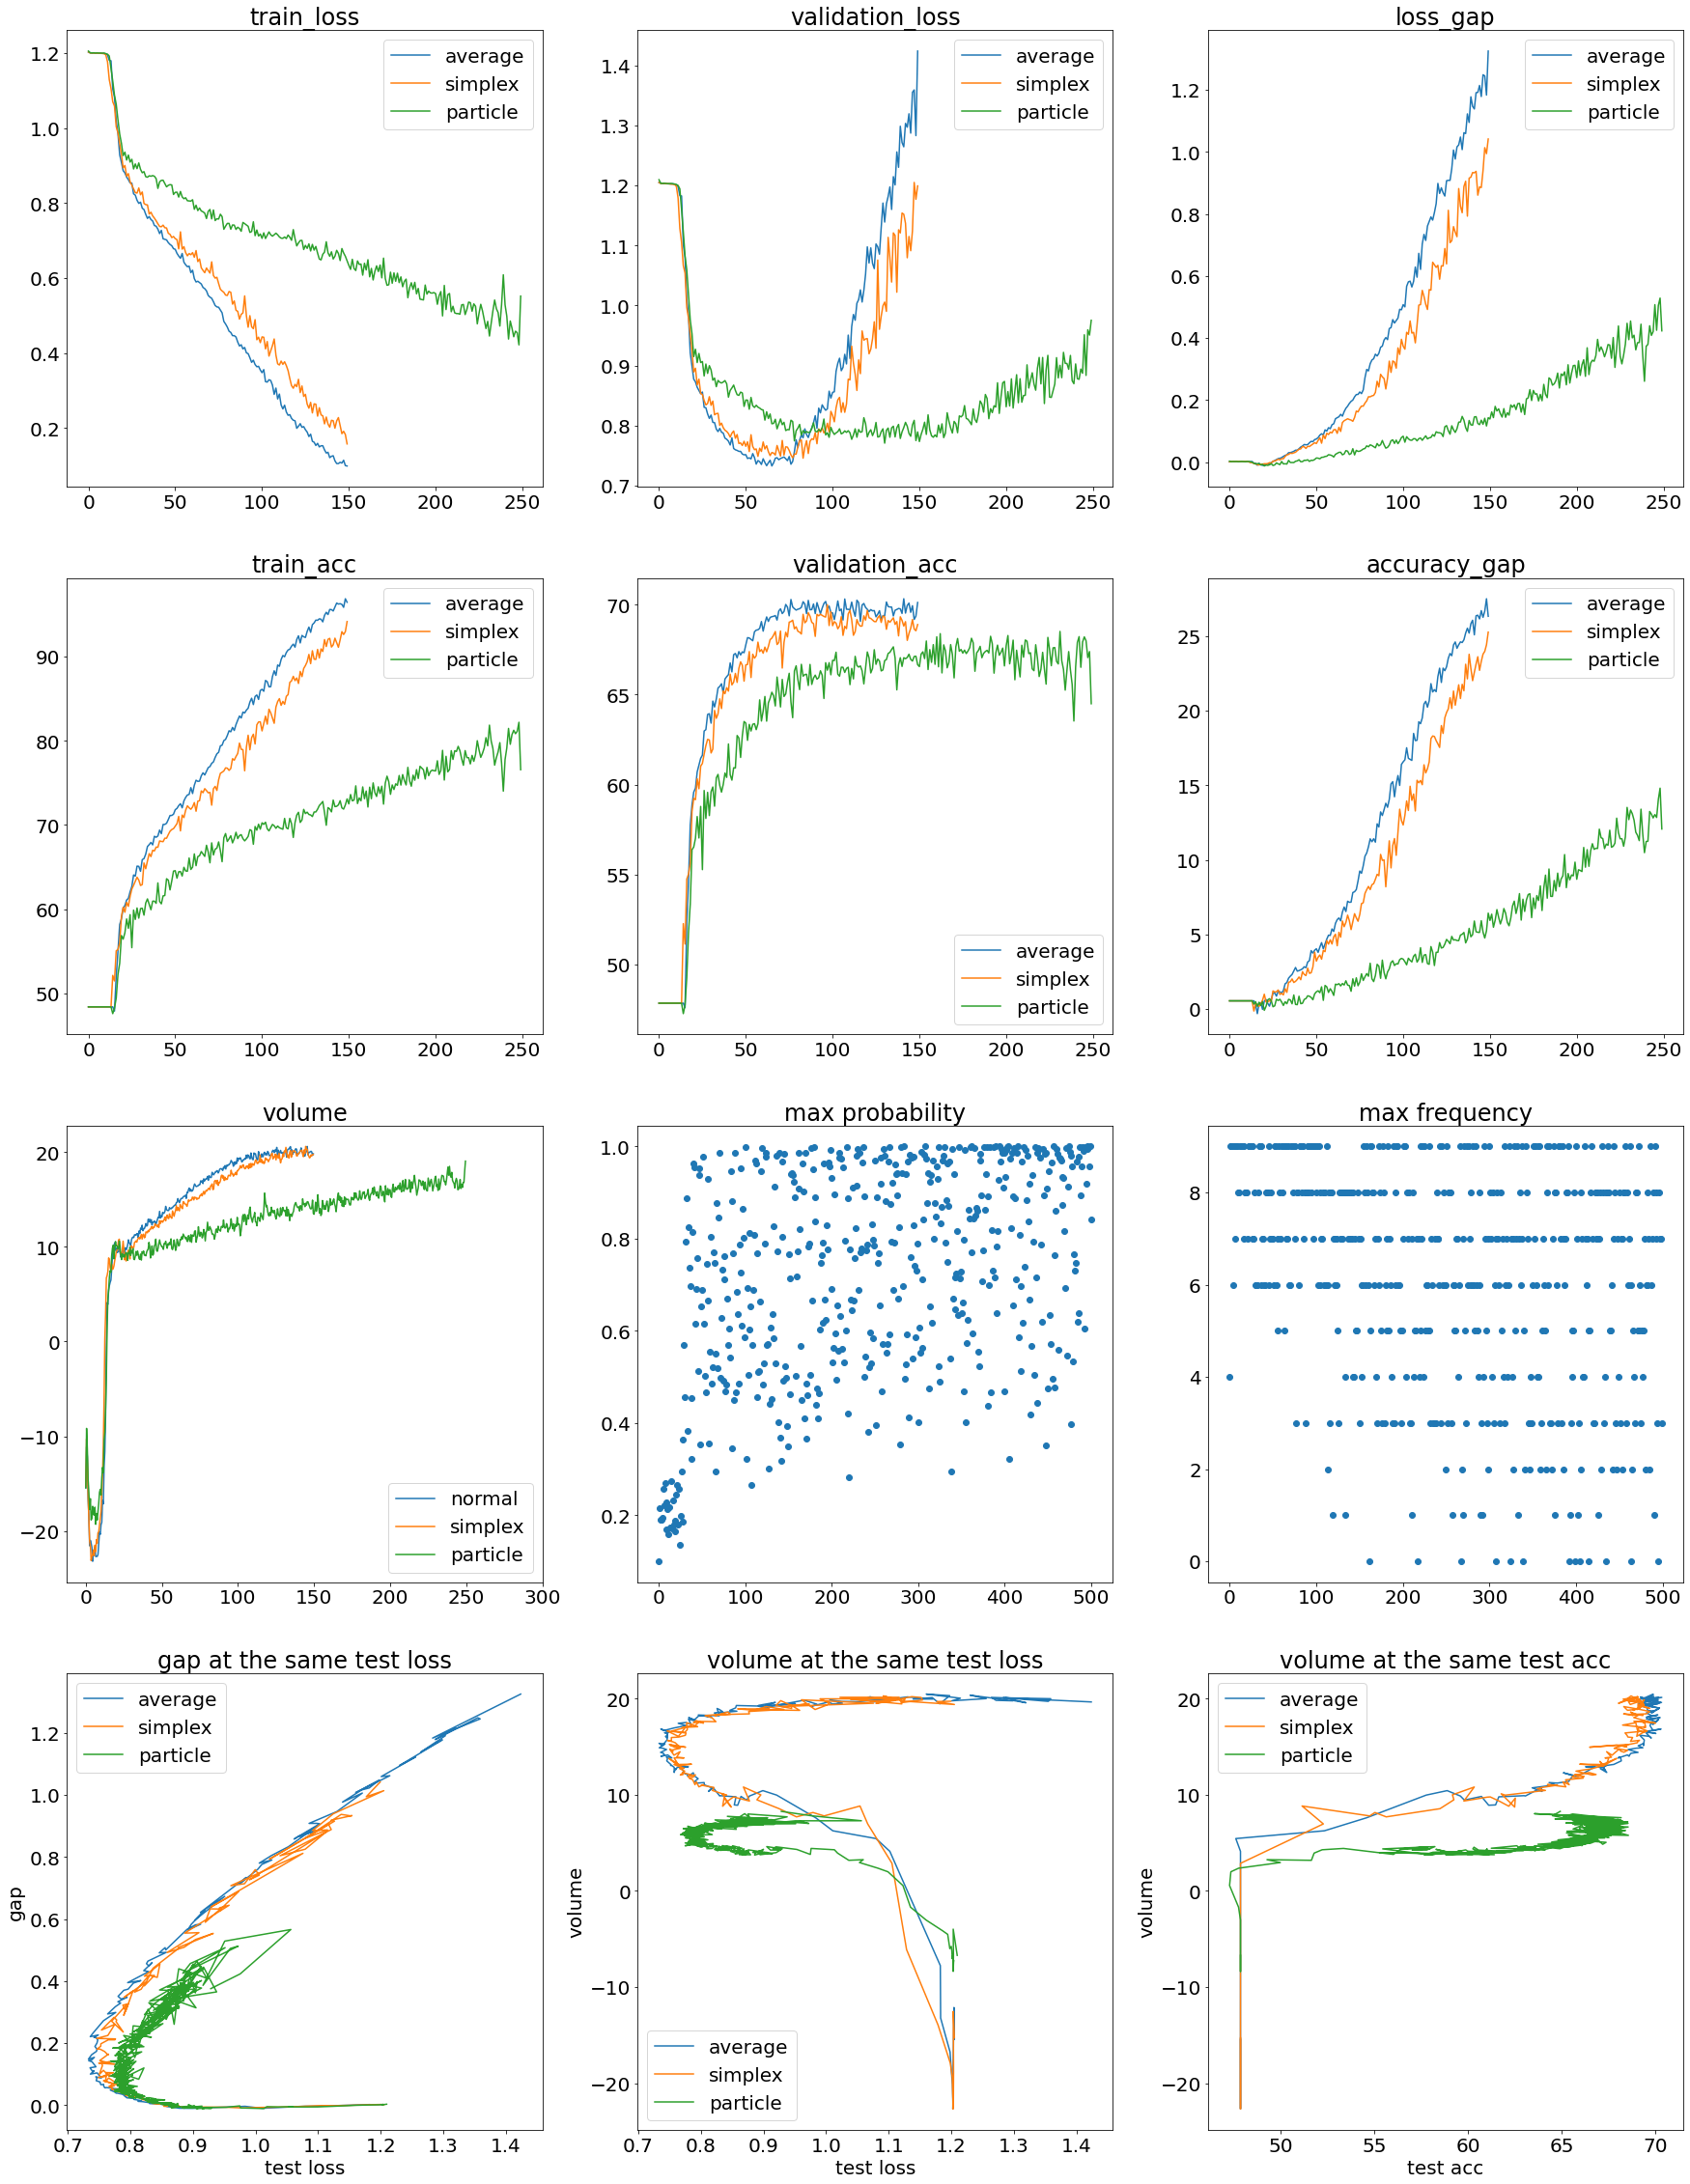

In [57]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({'font.size': 20})
file_prefix = '/Users/jclialex/PycharmProjects/whiteboxmi_expdata/expdata/simplex/'

epochs = np.arange(149)+1
num_user = 10
dataset = 'fashion_product_season'
eval_data_size = 100
model = 'fashion_product'
total_data_num = 2000
#num_step_list = [1,5,10,20]
num_step_list = [10]
batch_size = 100
total_step = int(total_data_num / batch_size)
#comm_round_list = [[19],[3],[1],[0]]
comm_round_list = [[1]]
particle_total_epoch = 250

particle_chosen_index = []


for this_step in num_step_list:
    fig = plt.figure(figsize=(30,40))
    
    plt.subplot(4,3,1)
    file_name = file_prefix+f'loss_{num_user}_'+str(this_step)+f'_{dataset}_2000_{model}.npy'
    this_loss = np.load(file_name)
    plt.plot(np.arange(len(this_loss)),this_loss[:,0])
    file_name = file_prefix+f'loss_{num_user}_'+str(this_step)+f'_simplex_sampling_{dataset}_2000_{model}.npy'
    this_loss = np.load(file_name)
    plt.plot(np.arange(len(this_loss)),this_loss[:,0])
    file_name = file_prefix+f'loss_{num_user}_{this_step}_{particle_total_epoch}_particle_{dataset}_2000_{model}.npy'
    this_loss = np.load(file_name)
    this_loss = np.reshape(this_loss,(-1,num_user,2))
    
    for i in range(len(this_loss)):
        this_epoch_test_loss = this_loss[i,:,1]
        particle_chosen_index.append(np.argmin(this_epoch_test_loss))
    chosen_loss = [this_loss[i,particle_chosen_index[i],0] for i in range(len(this_loss))]
    chosen_loss = np.array(chosen_loss)
    round_index = np.array([2*i for i in range(len(this_loss)//2)]).astype(np.int64)
    #print (round_index)
    plt.plot(np.arange(len(round_index)),chosen_loss[round_index])
    #plt.plot(np.arange(len(this_loss)),chosen_loss)
    plt.title("train_loss")
    plt.legend(['average','simplex','particle'])

    plt.subplot(4,3,2)
    file_name = file_prefix+f'loss_{num_user}_'+str(this_step)+f'_{dataset}_2000_{model}.npy'
    this_loss = np.load(file_name)
    plt.plot(np.arange(len(this_loss)),this_loss[:,1])
    print (np.amin(this_loss[:,1]))
    file_name = file_prefix+f'loss_{num_user}_'+str(this_step)+f'_simplex_sampling_{dataset}_2000_{model}.npy'
    this_loss = np.load(file_name)
    plt.plot(np.arange(len(this_loss)),this_loss[:,1])
    print (np.amin(this_loss[:,1]))
    file_name = file_prefix+f'loss_{num_user}_{this_step}_{particle_total_epoch}_particle_{dataset}_2000_{model}.npy'
    this_loss = np.load(file_name)
    this_loss = np.reshape(this_loss,(-1,num_user,2))
    chosen_loss = [this_loss[i,particle_chosen_index[i],1] for i in range(len(this_loss))]
    chosen_loss = np.array(chosen_loss)
    print (np.amin(chosen_loss))
    round_index = np.array([2*i for i in range(len(this_loss)//2)])
    plt.plot(round_index/2,chosen_loss[round_index])
    #plt.plot(np.arange(len(this_loss)),chosen_loss)
    plt.legend(['average','simplex','particle'])
    plt.title("validation_loss")
    
    
    plt.subplot(4,3,3)
    file_name = file_prefix+f'loss_{num_user}_'+str(this_step)+f'_{dataset}_2000_{model}.npy'
    this_loss = np.load(file_name)
    plt.plot(np.arange(len(this_loss)),this_loss[:,1]-this_loss[:,0])
    file_name = file_prefix+f'loss_{num_user}_'+str(this_step)+f'_simplex_sampling_{dataset}_2000_{model}.npy'
    this_loss = np.load(file_name)
    plt.plot(np.arange(len(this_loss)),this_loss[:,1]-this_loss[:,0])
    file_name = file_prefix+f'loss_{num_user}_{this_step}_{particle_total_epoch}_particle_{dataset}_2000_{model}.npy'
    this_loss = np.load(file_name)
    this_loss = np.reshape(this_loss,(-1,num_user,2))
    chosen_loss = [this_loss[i,particle_chosen_index[i],1]-this_loss[i,particle_chosen_index[i],0] for i in range(len(this_loss))]
    
    chosen_loss = np.array(chosen_loss)
    round_index = np.array([2*i for i in range(len(this_loss)//2)])
    plt.plot(round_index/2,chosen_loss[round_index])
    #plt.plot(np.arange(len(this_loss)),chosen_loss)
    plt.legend(['average','simplex','particle'])
    plt.title("loss_gap")

    plt.subplot(4,3,4)
    file_name = file_prefix+f'acc_{num_user}_'+str(this_step)+f'_{dataset}_2000_{model}.npy'
    this_loss = np.load(file_name)
    plt.plot(np.arange(len(this_loss)),this_loss[:,0])
    file_name = file_prefix+f'acc_{num_user}_'+str(this_step)+f'_simplex_sampling_{dataset}_2000_{model}.npy'
    this_loss = np.load(file_name)
    plt.plot(np.arange(len(this_loss)),this_loss[:,0])
    file_name = file_prefix+f'acc_{num_user}_{this_step}_{particle_total_epoch}_particle_{dataset}_2000_{model}.npy'
    this_loss = np.load(file_name)
    this_loss = np.reshape(this_loss,(-1,num_user,2))
    chosen_loss = [this_loss[i,particle_chosen_index[i],0] for i in range(len(this_loss))]
    
    chosen_loss = np.array(chosen_loss)
    round_index = np.array([2*i for i in range(len(this_loss)//2)])
    plt.plot(round_index/2,chosen_loss[round_index])
    #plt.plot(np.arange(len(this_loss)),chosen_loss)
    plt.title("train_acc")
    plt.legend(['average','simplex','particle'])
    
    plt.subplot(4,3,5)
    file_name = file_prefix+f'acc_{num_user}_'+str(this_step)+f'_{dataset}_2000_{model}.npy'
    this_loss = np.load(file_name)
    plt.plot(np.arange(len(this_loss)),this_loss[:,1])
    file_name = file_prefix+f'acc_{num_user}_'+str(this_step)+f'_simplex_sampling_{dataset}_2000_{model}.npy'
    this_loss = np.load(file_name)
    plt.plot(np.arange(len(this_loss)),this_loss[:,1])
    file_name = file_prefix+f'acc_{num_user}_{this_step}_{particle_total_epoch}_particle_{dataset}_2000_{model}.npy'
    this_loss = np.load(file_name)
    this_loss = np.reshape(this_loss,(-1,num_user,2))
    chosen_loss = [this_loss[i,particle_chosen_index[i],1] for i in range(len(this_loss))]
    
    chosen_loss = np.array(chosen_loss)
    round_index = np.array([2*i for i in range(len(this_loss)//2)])
    plt.plot(round_index/2,chosen_loss[round_index])
    #plt.plot(np.arange(len(this_loss)),chosen_loss)
    plt.legend(['average','simplex','particle'])
    plt.title("validation_acc")
    
    plt.subplot(4,3,6)
    file_name = file_prefix+f'acc_{num_user}_'+str(this_step)+f'_{dataset}_2000_{model}.npy'
    this_loss = np.load(file_name)
    plt.plot(np.arange(len(this_loss)),this_loss[:,0] - this_loss[:,1])
    file_name = file_prefix+f'acc_{num_user}_'+str(this_step)+f'_simplex_sampling_{dataset}_2000_{model}.npy'
    this_loss = np.load(file_name)
    plt.plot(np.arange(len(this_loss)),this_loss[:,0] - this_loss[:,1])
    file_name = file_prefix+f'acc_{num_user}_{this_step}_{particle_total_epoch}_particle_{dataset}_2000_{model}.npy'
    this_loss = np.load(file_name)
    this_loss = np.reshape(this_loss,(-1,num_user,2))
    chosen_loss = [this_loss[i,particle_chosen_index[i],0]-this_loss[i,particle_chosen_index[i],1] for i in range(len(this_loss))]
    
    chosen_loss = np.array(chosen_loss)
    round_index = np.array([2*i for i in range(len(this_loss)//2)])
    plt.plot(round_index/2,chosen_loss[round_index])
    #plt.plot(np.arange(len(this_loss)),chosen_loss)
    plt.legend(['average','simplex','particle'])
    plt.title("accuracy_gap")
    
    plt.subplot(4,3,7)
    file_name = file_prefix+f'volume_{num_user}_'+str(this_step)+f'_{dataset}_2000_{model}.npy'
    this_volume = np.load(file_name)
    plt.plot(np.arange(len(this_volume)),np.log(this_volume[:,1]))
    file_name = file_prefix+f'volume_{num_user}_'+str(this_step)+f'_simplex_sampling_{dataset}_2000_{model}.npy'
    this_volume = np.load(file_name)
    plt.plot(np.arange(len(this_volume)),np.log(this_volume[:,1]))
    file_name = file_prefix+f'volume_{num_user}_'+str(this_step)+f'_{particle_total_epoch}_particle_{dataset}_2000_{model}.npy'
    this_volume = np.load(file_name)
    
    #round_index = np.array([2*i for i in range(len(this_loss)//2)])
    #plt.plot(round_index/2,np.log(this_volume[round_index,1]))
    plt.plot(np.arange(len(this_volume)),np.log(this_volume[:,1]))
    
    plt.xticks([0,100,200,300,400,500,600],[0,50,100,150,200,250,300])
    
    plt.legend(['normal','simplex','particle'])
    plt.title('volume')
    
    plt.subplot(4,3,8)
    file_name = file_prefix+f'likelihood_{num_user}_'+str(this_step)+f'_{particle_total_epoch}_particle_{dataset}_2000_{model}.npy'
    this_likelihood = np.load(file_name)
    print (this_likelihood.shape)
    plt.scatter(np.arange(len(this_likelihood)),np.amax(this_likelihood,axis=1))
    plt.title('max probability')
    
    plt.subplot(4,3,9)
    file_name = file_prefix+f'sampling_stat_{num_user}_'+str(this_step)+f'_{particle_total_epoch}_particle_{dataset}_2000_{model}.npy'
    this_likelihood = np.load(file_name)
    print (this_likelihood.shape)
    plt.scatter(np.arange(len(this_likelihood)),np.amax(this_likelihood,axis=1))
    plt.title('max frequency')
    
    plt.subplot(4,3,10)
    file_name = file_prefix+f'loss_{num_user}_'+str(this_step)+f'_{dataset}_2000_{model}.npy'
    this_loss = np.load(file_name)
    plt.plot(this_loss[:,1],this_loss[:,1] - this_loss[:,0])
    file_name = file_prefix+f'loss_{num_user}_'+str(this_step)+f'_simplex_sampling_{dataset}_2000_{model}.npy'
    this_loss = np.load(file_name)
    plt.plot(this_loss[:,1],this_loss[:,1] - this_loss[:,0])
    file_name = file_prefix+f'loss_{num_user}_{this_step}_{particle_total_epoch}_particle_{dataset}_2000_{model}.npy'
    this_loss = np.load(file_name)
    this_loss = np.reshape(this_loss,(-1,num_user,2))
    chosen_test_loss = np.array([this_loss[i,particle_chosen_index[i],1] for i in range(len(this_loss))])
    chosen_train_loss = np.array([this_loss[i,particle_chosen_index[i],0] for i in range(len(this_loss))])
    plt.plot(chosen_test_loss,chosen_test_loss-chosen_train_loss)
    plt.legend(['average','simplex','particle'])
    plt.title("gap at the same test loss")
    plt.xlabel('test loss')
    plt.ylabel('gap')
    
    volume_index = np.arange(150)*2
    
    plt.subplot(4,3,11)
    file_name = file_prefix+f'loss_{num_user}_'+str(this_step)+f'_{dataset}_2000_{model}.npy'
    this_loss = np.load(file_name)
    file_name = file_prefix+f'volume_{num_user}_'+str(this_step)+f'_{dataset}_2000_{model}.npy'
    this_volume = np.load(file_name)
    plt.plot(this_loss[:,1],np.log(this_volume[volume_index,1]))
    file_name = file_prefix+f'loss_{num_user}_'+str(this_step)+f'_simplex_sampling_{dataset}_2000_{model}.npy'
    this_loss = np.load(file_name)
    file_name = file_prefix+f'volume_{num_user}_'+str(this_step)+f'_simplex_sampling_{dataset}_2000_{model}.npy'
    this_volume = np.load(file_name)
    plt.plot(this_loss[:,1],np.log(this_volume[volume_index,1]))
    file_name = file_prefix+f'loss_{num_user}_{this_step}_{particle_total_epoch}_particle_{dataset}_2000_{model}.npy'
    this_loss = np.load(file_name)
    this_loss = np.reshape(this_loss,(-1,num_user,2))
    file_name = file_prefix+f'volume_{num_user}_'+str(this_step)+f'_{particle_total_epoch}_particle_{dataset}_2000_{model}.npy'
    this_volume = np.load(file_name)
    chosen_test_loss = np.array([this_loss[i,particle_chosen_index[i],1] for i in range(len(this_loss))])
    chosen_train_loss = np.array([this_loss[i,particle_chosen_index[i],0] for i in range(len(this_loss))])
    plt.plot(chosen_test_loss,np.log10(this_volume[:,1]))
    plt.legend(['average','simplex','particle'])
    plt.title("volume at the same test loss")
    plt.xlabel('test loss')
    plt.ylabel('volume')
    
    plt.subplot(4,3,12)
    file_name = file_prefix+f'acc_{num_user}_'+str(this_step)+f'_{dataset}_2000_{model}.npy'
    this_loss = np.load(file_name)
    file_name = file_prefix+f'volume_{num_user}_'+str(this_step)+f'_{dataset}_2000_{model}.npy'
    this_volume = np.load(file_name)
    plt.plot(this_loss[:,1],np.log(this_volume[volume_index,1]))
    file_name = file_prefix+f'acc_{num_user}_'+str(this_step)+f'_simplex_sampling_{dataset}_2000_{model}.npy'
    this_loss = np.load(file_name)
    file_name = file_prefix+f'volume_{num_user}_'+str(this_step)+f'_simplex_sampling_{dataset}_2000_{model}.npy'
    this_volume = np.load(file_name)
    plt.plot(this_loss[:,1],np.log(this_volume[volume_index,1]))
    file_name = file_prefix+f'acc_{num_user}_{this_step}_{particle_total_epoch}_particle_{dataset}_2000_{model}.npy'
    this_loss = np.load(file_name)
    this_loss = np.reshape(this_loss,(-1,num_user,2))
    file_name = file_prefix+f'volume_{num_user}_'+str(this_step)+f'_{particle_total_epoch}_particle_{dataset}_2000_{model}.npy'
    this_volume = np.load(file_name)
    chosen_test_loss = np.array([this_loss[i,particle_chosen_index[i],1] for i in range(len(this_loss))])
    chosen_train_loss = np.array([this_loss[i,particle_chosen_index[i],0] for i in range(len(this_loss))])
    plt.plot(chosen_test_loss,np.log10(this_volume[:,1]))
    plt.legend(['average','simplex','particle'])
    plt.title("volume at the same test acc")
    plt.xlabel('test acc')
    plt.ylabel('volume')
    
    
    plt.savefig(f'{dataset}_{this_step}step_particle_summary.pdf',dpi=800,bbox_inches='tight')